In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [272]:
dataset = pd.read_csv("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022clean.csv")

In [273]:
checkpoint = ModelCheckpoint('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_4.h5', monitor='val_loss', verbose=1, save_best_only=True)

In [274]:
print(dataset)

        Datetime  Latitude   Longitude  Kedalaman (km)  Magnitude Type  \
0     2017-01-25   -5.3000  113.493398              12        0.0  NaN   
1     2017-01-26   -7.9900  111.200000              10        3.2  MLv   
2     2017-01-27    0.4000  118.729166              12        0.0  NaN   
3     2017-01-28   -9.4400  113.060000              10        4.7    M   
4     2017-01-29   -9.7300  112.870000              10        4.9  MLv   
...          ...       ...         ...             ...        ...  ...   
2153  2022-12-27   -7.8601  110.529800              13        1.3  MLv   
2154  2022-12-28   -8.8718  112.456500              44        3.2  MLv   
2155  2022-12-29   -9.0316  112.148100              10        3.2  MLv   
2156  2022-12-30  -10.2996  113.280300              10        3.6  MLv   
2157  2022-12-31  -10.2996  113.280300              10        3.6  MLv   

                                             Keterangan Dirasakan    M    D  \
0                               

In [275]:
train_dates = pd.to_datetime(dataset['Datetime'])

In [276]:
data = dataset[['Latitude', 'Longitude', 'Kedalaman (km)', 'Magnitude']]
values = data.values
values = values.astype('float64')

In [277]:
values.dtype

dtype('float64')

In [278]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [279]:
data_for_training = data[['Latitude', 'Longitude', 'Kedalaman (km)', 'Magnitude']].astype(float)

In [280]:
scaler = StandardScaler()
scaler = scaler.fit(data_for_training)
data_for_training_scaled = scaler.transform(data_for_training)

In [281]:
train_X = []
train_y = []

In [282]:
n_future = 1
n_past = 30

for i in range(n_past, len(data_for_training_scaled) - n_future +1):
    train_X.append(data_for_training_scaled[i - n_past:i, 0:data_for_training.shape[1]])
    train_y.append(data_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [283]:
train_X, train_y = np.array(train_X), np.array(train_y)

In [284]:
X_training, X_test, y_training, y_test  = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

In [285]:
print(X_training.shape, y_training.shape, X_test.shape, y_test.shape)

(1702, 30, 4) (1702, 1) (426, 30, 4) (426, 1)


In [286]:
print('train_X shape =={}.'.format(train_X.shape))
print('train_y shape =={}.'.format(train_y.shape))

train_X shape ==(2128, 30, 4).
train_y shape ==(2128, 1).


In [287]:
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
# Third LSTM layer
model.add(LSTM(units=48,activation='relu', return_sequences=True))
model.add(LSTM(units=32,activation='relu', return_sequences=True))
model.add(LSTM(units=16,activation='relu', return_sequences=True))
# Fourth LSTM layer
model.add(LSTM(units=16, activation='relu'))
# The output layer
model.add(Dense(units=1, activation='linear'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 30, 64)            17664     
                                                                 
 lstm_49 (LSTM)              (None, 30, 48)            21696     
                                                                 
 lstm_50 (LSTM)              (None, 30, 32)            10368     
                                                                 
 lstm_51 (LSTM)              (None, 30, 16)            3136      
                                                                 
 lstm_52 (LSTM)              (None, 16)                2112      
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 54,993
Trainable params: 54,993
Non-tra

In [288]:
optimizer=Adam(learning_rate=0.001)

In [289]:
model.compile(optimizer=optimizer, loss='mae')

In [290]:
history = model.fit(X_training, y_training, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, callbacks=[checkpoint])

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.57846, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
24/24 - 5s - loss: 0.6240 - val_loss: 0.5785 - 5s/epoch - 206ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.57846 to 0.57613, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
24/24 - 1s - loss: 0.5850 - val_loss: 0.5761 - 1s/epoch - 54ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.57613 to 0.57574, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
24/24 - 1s - loss: 0.5840 - val_loss: 0.5757 - 1s/epoch - 54ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.57574
24/24 - 1s - loss: 0.5827 - val_loss: 0.5773 - 1s/epoch - 53ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.57574 to 0.57524, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
24/24 - 1s - loss: 0.5838 - val_loss: 0.5752 - 1s/epoch - 54ms/step
Epoch 6/50

Epoc

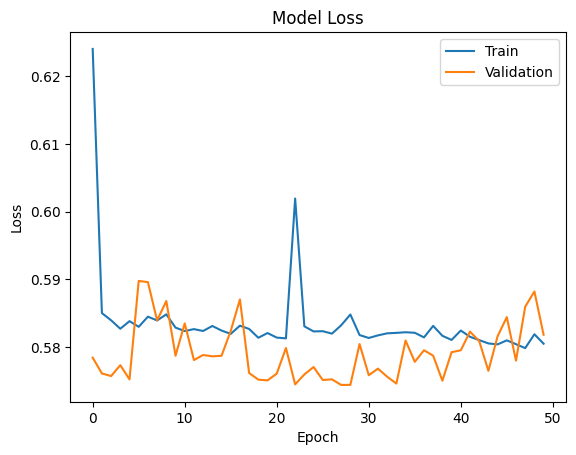

In [291]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [292]:
model = load_model("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_4.h5")
loss = model.evaluate(X_test, y_test)
print("Loss:", loss)

14/14 [==============================] - 1s 12ms/step - loss: 0.5744
Loss: 0.5744320750236511


In [293]:
n_past = 1
n_days_for_prediction=366
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='1d').tolist()
print(predict_period_dates)

[Timestamp('2022-12-31 00:00:00'), Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-04 00:00:00'), Timestamp('2023-01-05 00:00:00'), Timestamp('2023-01-06 00:00:00'), Timestamp('2023-01-07 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-09 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-01-16 00:00:00'), Timestamp('2023-01-17 00:00:00'), Timestamp('2023-01-18 00:00:00'), Timestamp('2023-01-19 00:00:00'), Timestamp('2023-01-20 00:00:00'), Timestamp('2023-01-21 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-23 00:00:00'), Timestamp('2023-01-24 00:00:00'), Timestamp('2023-01-25 00:00:00'), Timestamp('2023-01-26 00:00:00'), Timestamp('2023-01-27 00:00:00'), Timestamp('2023-01-28 00:00:00'), Timestamp('20

In [294]:
prediction = model.predict(X_training[-n_days_for_prediction:])

12/12 [==============================] - 1s 12ms/step


In [295]:
print(prediction)

[[-0.33972642]
 [-0.3093674 ]
 [-0.30589658]
 [-0.3372985 ]
 [-0.3396228 ]
 [-0.33747527]
 [-0.3333089 ]
 [-0.33869743]
 [-0.30915585]
 [-0.34336352]
 [-0.35581675]
 [-0.32407635]
 [-0.33527493]
 [-0.3418251 ]
 [-0.32128176]
 [-0.32307497]
 [-0.33945855]
 [-0.31242207]
 [-0.33453056]
 [-0.33837938]
 [-0.31786427]
 [-0.32899877]
 [-0.32333377]
 [-0.34741816]
 [-0.33782598]
 [-0.31195673]
 [-0.3170743 ]
 [-0.32814306]
 [-0.34192666]
 [-0.34850278]
 [-0.34253398]
 [-0.34250614]
 [-0.3335996 ]
 [-0.33012572]
 [-0.33963063]
 [-0.34439275]
 [-0.32348397]
 [-0.32377753]
 [-0.30195105]
 [-0.33896488]
 [-0.33028954]
 [-0.335364  ]
 [-0.31350517]
 [-0.32969952]
 [-0.30970755]
 [-0.336997  ]
 [-0.31928676]
 [-0.33344433]
 [-0.32964095]
 [-0.3384398 ]
 [-0.31748912]
 [-0.31587714]
 [-0.31035054]
 [-0.3479208 ]
 [-0.34184337]
 [-0.31795532]
 [-0.34983638]
 [-0.31585872]
 [-0.31884363]
 [-0.31667572]
 [-0.34719774]
 [-0.34652174]
 [-0.3496597 ]
 [-0.30552733]
 [-0.33823392]
 [-0.3232951 ]
 [-0.33956

In [296]:
prediction_copies = np.repeat(prediction, data_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,-1]
y_pred_future = np.abs(y_pred_future)

C:\Users\wajit\AppData\Local\Temp\ipykernel_18236\1059575106.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Datetime']=pd.to_datetime(original['Datetime'])


<Axes: xlabel='Datetime', ylabel='Magnitude'>

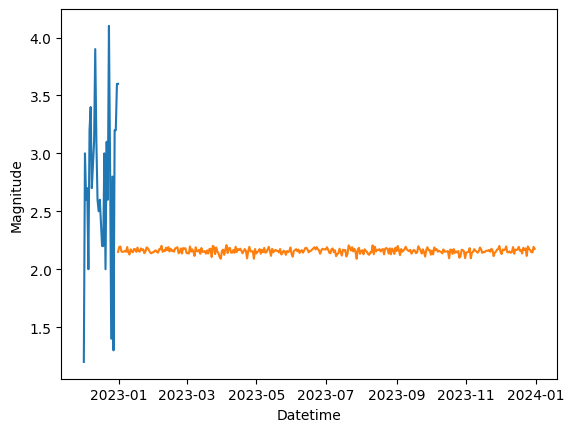

In [297]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Datetime': np.array(forecast_dates), 'Magnitude': y_pred_future})
df_forecast['Datetime'] = pd.to_datetime(df_forecast['Datetime'])


original = dataset[['Datetime', 'Magnitude']]
original['Datetime']=pd.to_datetime(original['Datetime'])
original = original.loc[original['Datetime'] >= '2022-12-1']

sns.lineplot(x=original['Datetime'], y=original['Magnitude'])
sns.lineplot(x=df_forecast['Datetime'], y=df_forecast['Magnitude'])